In [1]:
k = [0,2,4,6,8,10,12,14,16,18,20]

for i in k
    if i > 10
        break
    end
    println(i)
end

0
2
4
6
8
10


In [2]:
using LinearAlgebra

function degeneracy_detector(eigenvalues::AbstractVector{T}; tol = 1e-2) where T<:Number

    perm = sortperm(eigenvalues)
    vals = eigenvalues[perm]

    deg_groups = Vector{Vector{Int}}()
    used = falses(length(vals))

    for i in eachindex(vals)
        if used[i]
            continue
        end

        group = Int[]
        push!(group, perm[i])   # store original index
        used[i] = true

        for j in (i+1):length(vals)
            if !used[j] && abs(vals[i] - vals[j])/max(abs(vals[i]), abs(vals[j])) < tol
                push!(group, perm[j])
                used[j] = true
            end
        end

        # Skip non-degenerate groups (groups of size 1)
        if !(length(group) == 1)
            push!(deg_groups, group)
        end
    end

    return deg_groups
end


degeneracy_detector (generic function with 1 method)

In [3]:
eigs = [1.0, 1.000001, 2.0, 5.0, 5.1, 5.2, 5.3, 5.8, 5.9]

deg_groups = degeneracy_detector(eigs; tol=1e-1)

3-element Vector{Vector{Int64}}:
 [1, 2]
 [4, 5, 6, 7]
 [8, 9]

# Verify expensive steps

In [4]:
N = 30000
ks = [200, 500, 1000, 1500]

# expensive steps in the davidson algorithm
function Rayleigh_Ritz(N, k)
    return N^2 * k + N*k^2
end

function orthogonalization(N, k)
    return N * k^2
end

function eigen_decomposition(k)
    return k^3
end

eigen_decomposition (generic function with 1 method)

In [8]:
total_flops = []

for k in ks
    push!(total_flops, Rayleigh_Ritz(N, k) + orthogonalization(N, k) + eigen_decomposition(k))
end

function iterations_needed(k)
    return Int(1000 / k)  # --> idea is to perform a fit and see how many iterations are needed to converge 
end


iterations_needed (generic function with 1 method)

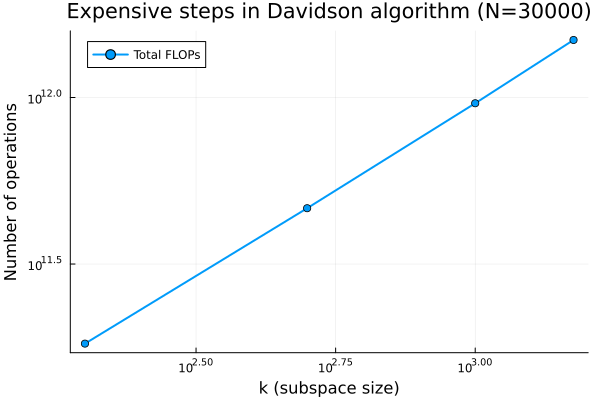

In [11]:
using Plots

# Plot all curves in one figure
plot(ks, total_flops , label="Total FLOPs", lw=2, marker=:circle, xlabel="k (subspace size)", ylabel="Number of operations", yscale=:log10, xscale=:log10)
title!("Expensive steps in Davidson algorithm (N=30000)")

In [16]:
molecule_dict = Dict(
    "H2" => 50,
    "formaldehyde" => 30,
    "uracil" => 20
)

for mol in keys(molecule_dict)
    println("Molecule: $mol")
    number = molecule_dict[mol]
    println("Number of occupied orbitals: $number")
end

Molecule: uracil
Number of occupied orbitals: 20
Molecule: formaldehyde
Number of occupied orbitals: 30
Molecule: H2
Number of occupied orbitals: 50
